# Analisis dan Prediksi Customer Churn Pada Industri Telekomunikasi 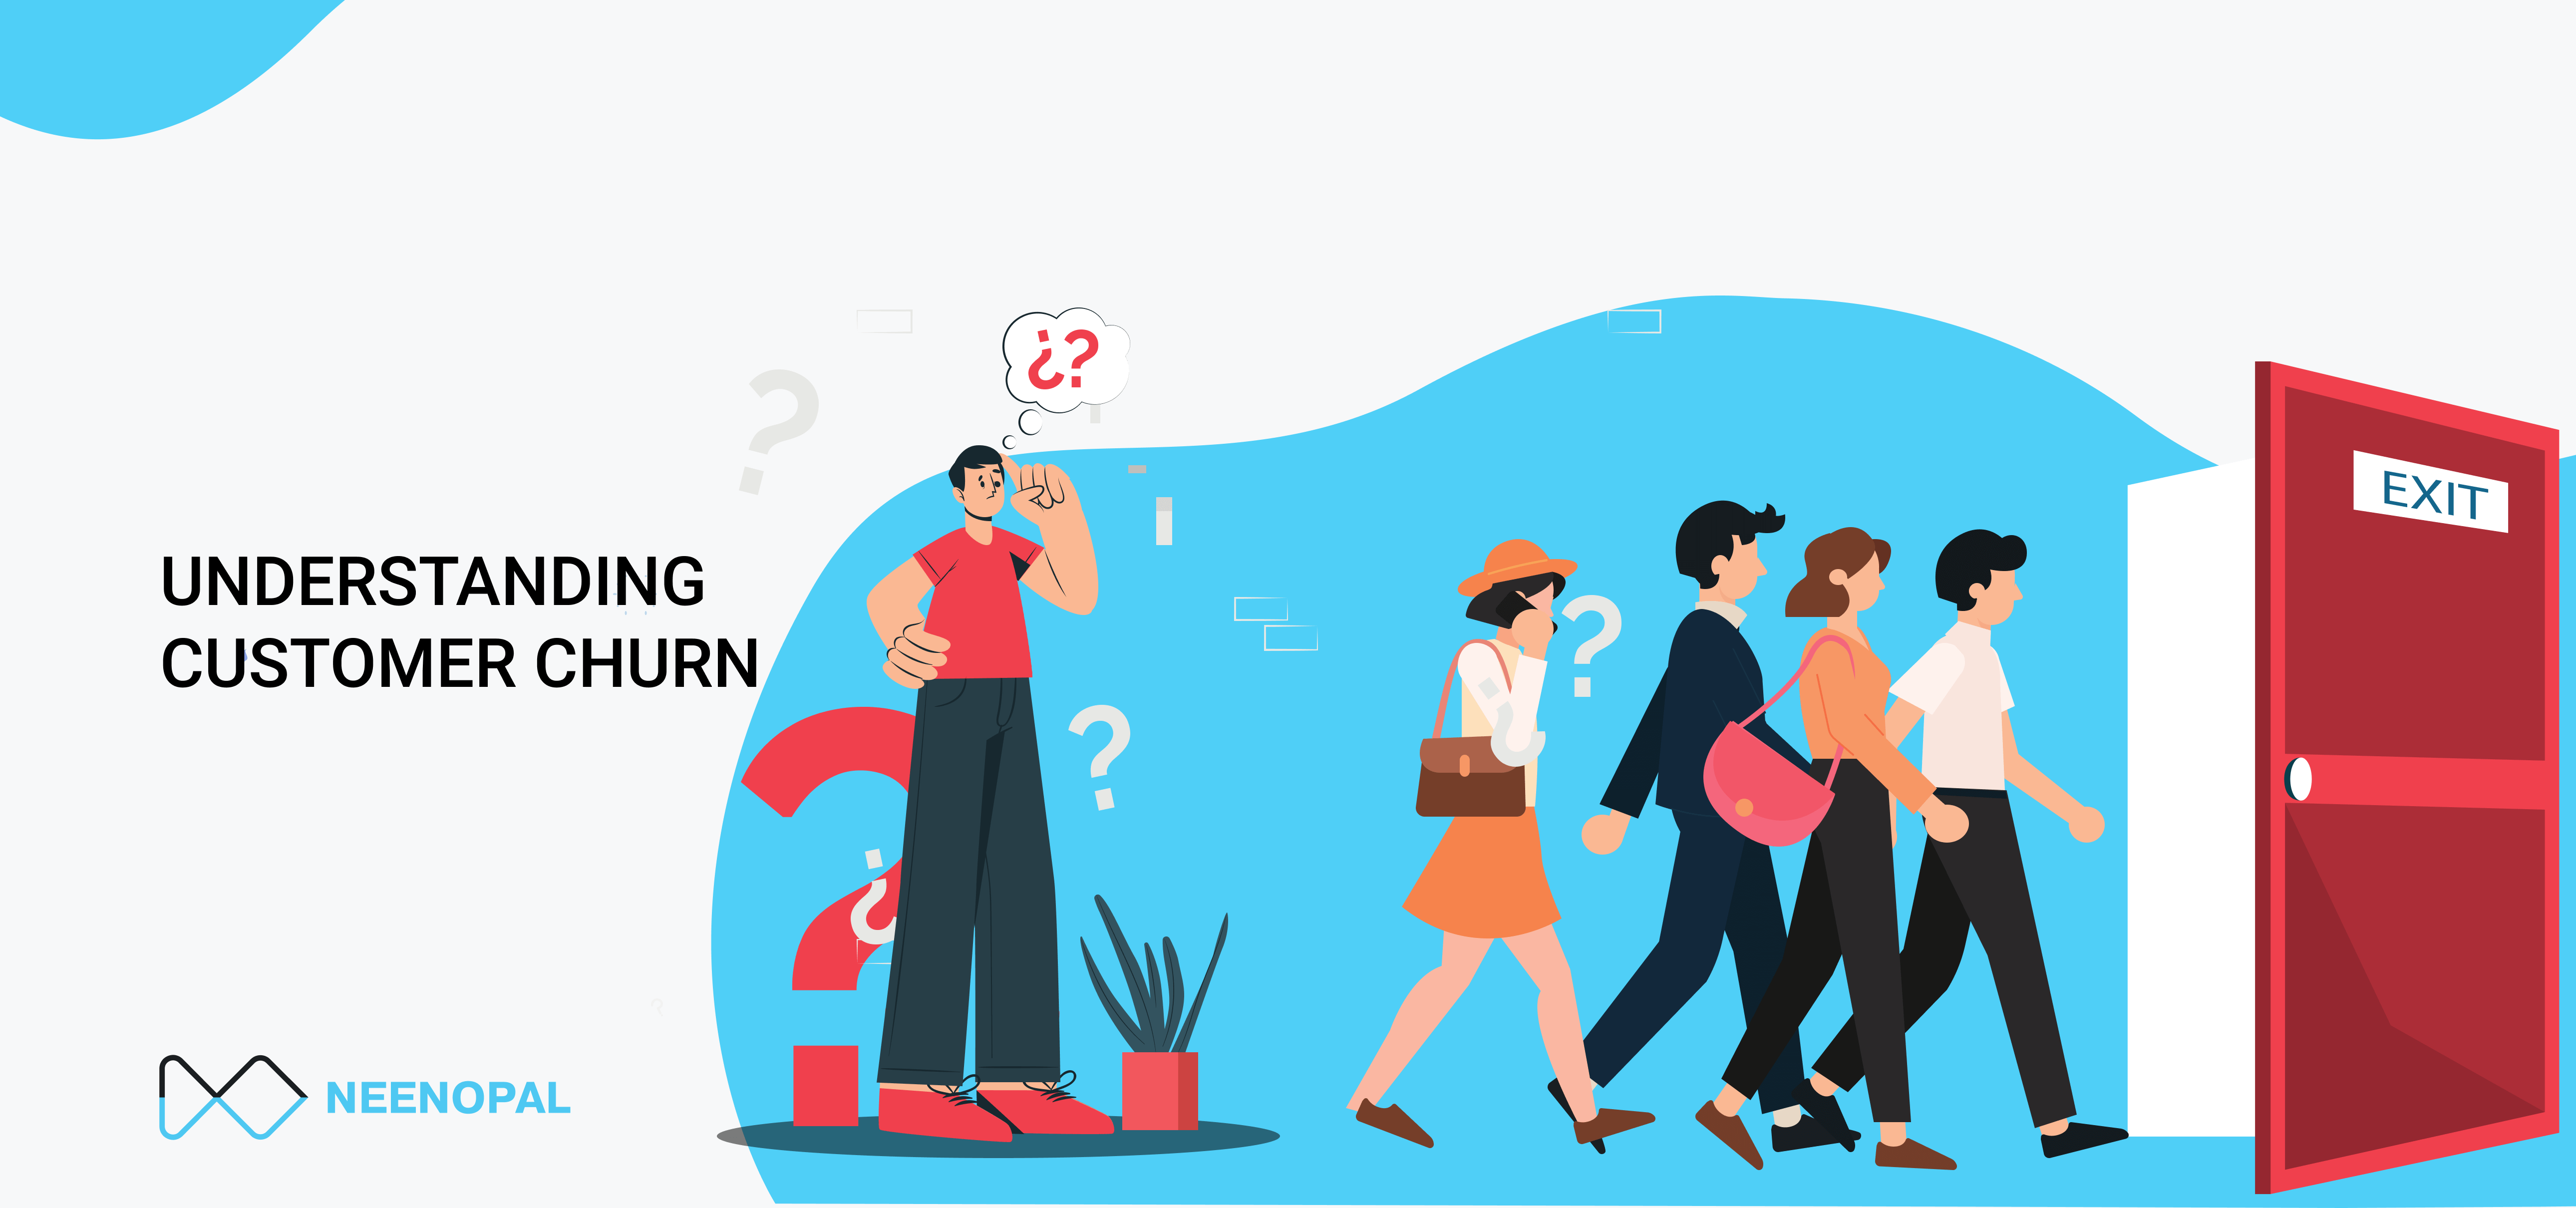

*Customer churn* adalah istilah yang digunakan untuk menggambarkan kehilangan pelanggan dari suatu bisnis. Churn rate adalah persentase pelanggan yang berhenti menggunakan produk atau layanan bisnis dalam jangka waktu tertentu. Churn rate dapat dihitung dengan menggunakan rumus berikut:


*`Churn rate = (Jumlah pelanggan yang berhenti / Jumlah pelanggan awal) * 100%`*


Churn rate yang tinggi dapat berdampak negatif terhadap bisnis, karena dapat menyebabkan penurunan pendapatan, profitabilitas, dan loyalitas pelanggan. Oleh karena itu, penting bagi bisnis untuk memahami penyebab churn rate dan mengambil langkah-langkah untuk menguranginya.


Faktor penyebab customer churn:
1. Ketidakpuasan pelanggan
2. Tidak mampu bersaing dengan kompetitor
3. Perubahan kebutuhan pelanggan


# Main Objectives:
1. Mengidentifikasi persentase customer churn pada bisnis telekomunikasi
2. Menganalisis variabel (feeatures) yang mendukung terjadinya customer churn
3. Membangun model machine learning yang sesuai untuk prediksi customer churn

# Dataset
[Data Science Week (DSW)](https://kaggle.com/datasets/0912a4f3cb904b0704b7826a288fd8d95cfa677d2a5589336904d05da33d2638)

# Informasi Dataset

1. Jumlah kolom : 17
2. Jumlah baris : 7048


---
Kolom:
1. Customer ID (A unique customer identifier)
2. Tenure Months (How long the customer has been with the company by the end of the quarter specified above)
3. Location (Customer's residence - City)
4. Device Class (Device classification)
5. Games Product (Whether the customer uses the internet service for games product)
6. Music Product (Whether the customer uses the internet service for music product)
7. Education Product (Whether the customer uses the internet service for education product)
8. Call Center (Whether the customer uses the call center service)
9. Video Product (Whether the customer uses video product service)
10. Use MyApp (Whether the customer uses MyApp service)
11. Payment Method (The method used for paying the bill)
12. onthly Purchase (Total customer’s monthly spent for all services with the unit of thousands of IDR)
13. Churn Label (Whether the customer left the company in this quarter)
14. Longitude (Customer’s residence - Longitude)
15. Latitude (Customer’s residence - Latitude)
16. CLTV (Customer Lifetime Value with the unit of thousands of IDR - Calculated using company's formulas)


# Model Machine Learning

Supervised Learning - Classification (Voting Classifier)

# Library
1. SK-Learn
2. Numpy
3. Pandas
4. Plotly
5. Matplotlib
6. Seaborn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Prepare all Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

from sklearn.ensemble import VotingClassifier


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

#Load Data & Data Wrangling

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/telco_customer.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Customer_ID,Tenure_Months,Location,Device_Class,Games_Product,Music_Product,Education_Product,Call_Center,Video_Product,Use_MyApp,Payment_Method,Monthly_Purchase_Th_IDR,Churn_Label,Longitude,Latitude,CLTV_Th_IDR_Pred
0,0,0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


In [ ]:
# Check data null
df.isnull().any().any()

False

In [ ]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0.1             7043 non-null   int64  
 1   Unnamed: 0               7043 non-null   int64  
 2   Customer_ID              7043 non-null   int64  
 3   Tenure_Months            7043 non-null   int64  
 4   Location                 7043 non-null   object 
 5   Device_Class             7043 non-null   object 
 6   Games_Product            7043 non-null   object 
 7   Music_Product            7043 non-null   object 
 8   Education_Product        7043 non-null   object 
 9   Call_Center              7043 non-null   object 
 10  Video_Product            7043 non-null   object 
 11  Use_MyApp                7043 non-null   object 
 12  Payment_Method           7043 non-null   object 
 13  Monthly_Purchase_Th_IDR  7043 non-null   float64
 14  Churn_Label             

In [ ]:
# Data Shape
df.shape

(7043, 18)

<Axes: >

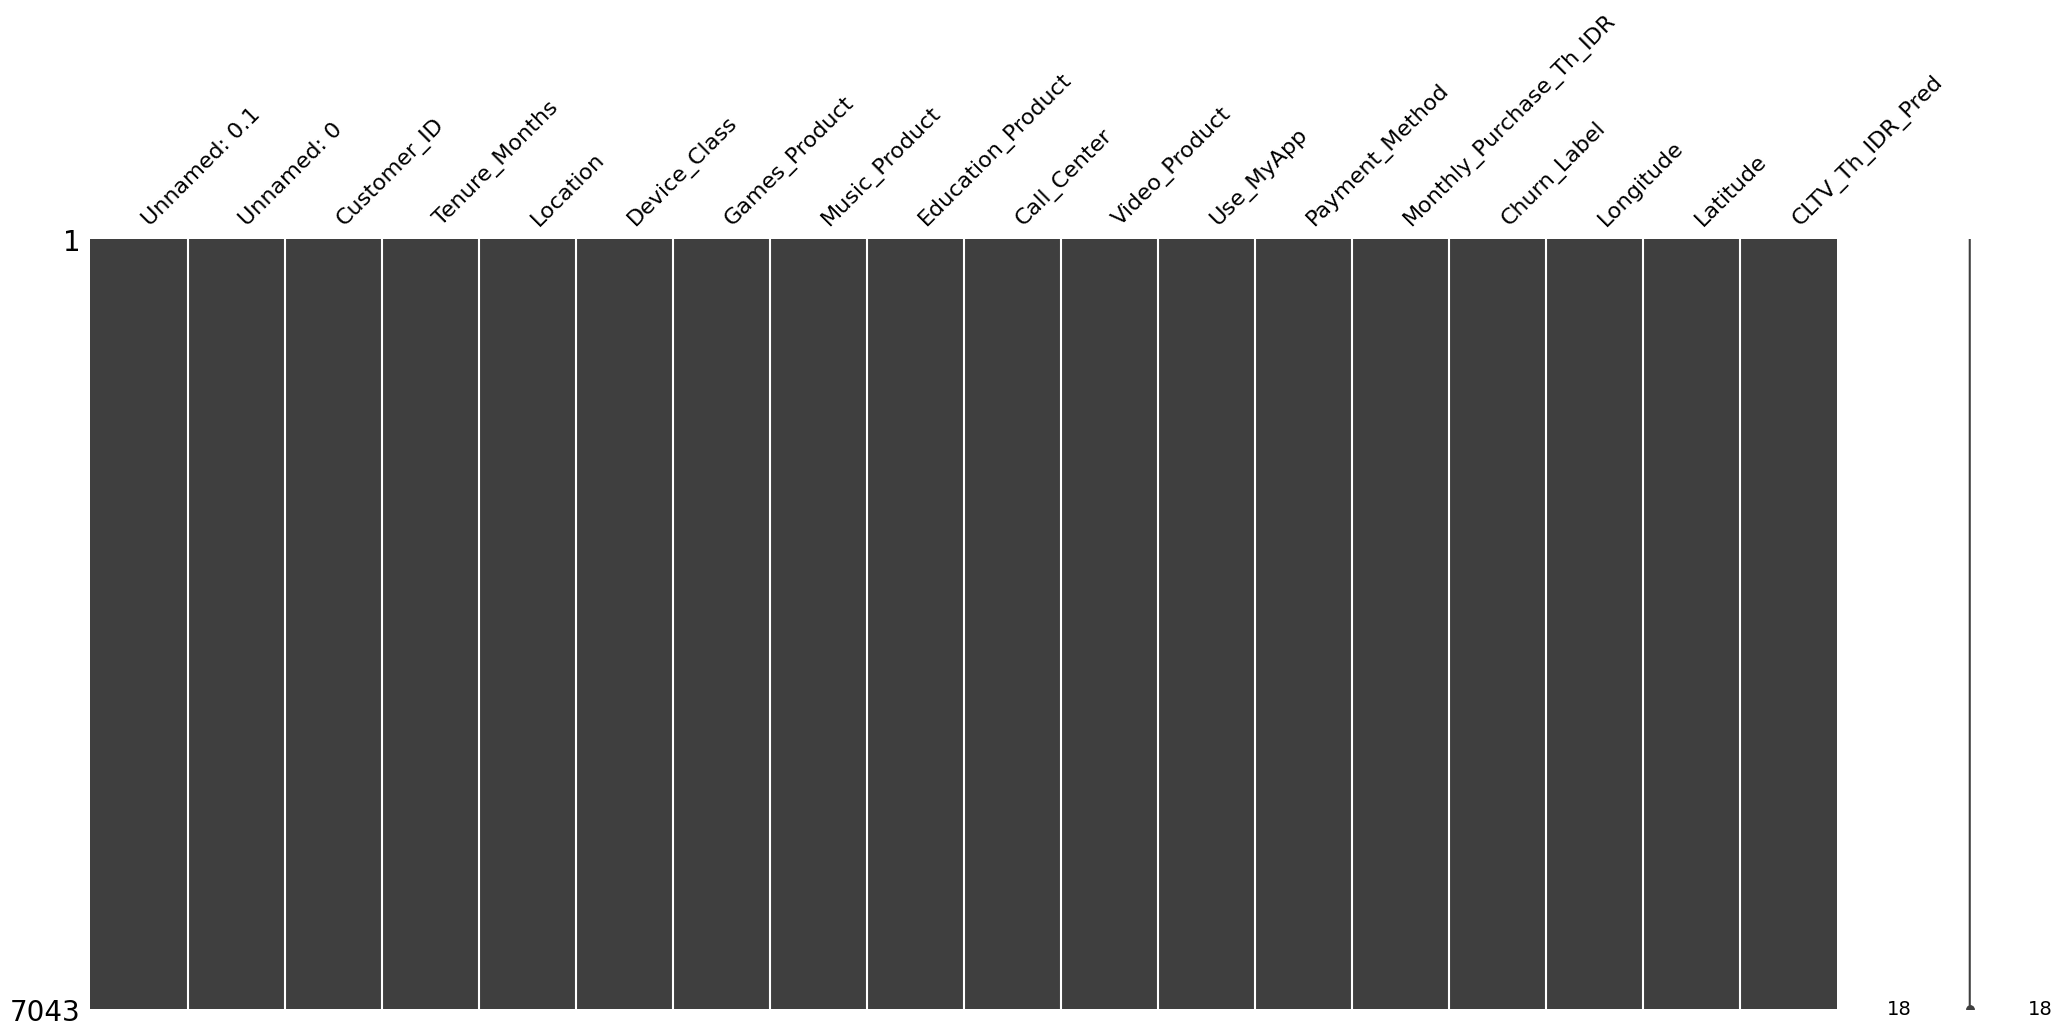

In [ ]:
# Visualizing Missing Values
import missingno as msno
msno.matrix(df)

In [ ]:
df_1 = df.drop(['Unnamed: 0.1'], axis = 1)

In [ ]:
df_1 = df.drop(['Unnamed: 0'], axis = 1)

In [ ]:
df_1.head()

,Unnamed: 0.1,Customer_ID,Tenure_Months,Location,Device_Class,Games_Product,Music_Product,Education_Product,Call_Center,Video_Product,Use_MyApp,Payment_Method,Monthly_Purchase_Th_IDR,Churn_Label,Longitude,Latitude,CLTV_Th_IDR_Pred
0,0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


## Outlier Identification

In [ ]:
# Prepare component to check outlier
Q1 = df_1.quantile(0.05)
Q3 = df_1.quantile(0.95)
IQR = Q3 - Q1
IQR.sort_values(ascending=False)

Unnamed: 0.1               6337.800000
Customer_ID                6337.800000
CLTV_Th_IDR_Pred           4928.300000
Monthly_Purchase_Th_IDR     114.075000
Tenure_Months                71.000000
Longitude                     0.793144
Latitude                      0.714744
dtype: float64

In [ ]:
# Check outlier
df_2 = df_1 [~((df_1 < (Q1 - 1.5 * IQR)) |(df_1 > (Q3 + 1.5 * IQR))).any(axis=1)]

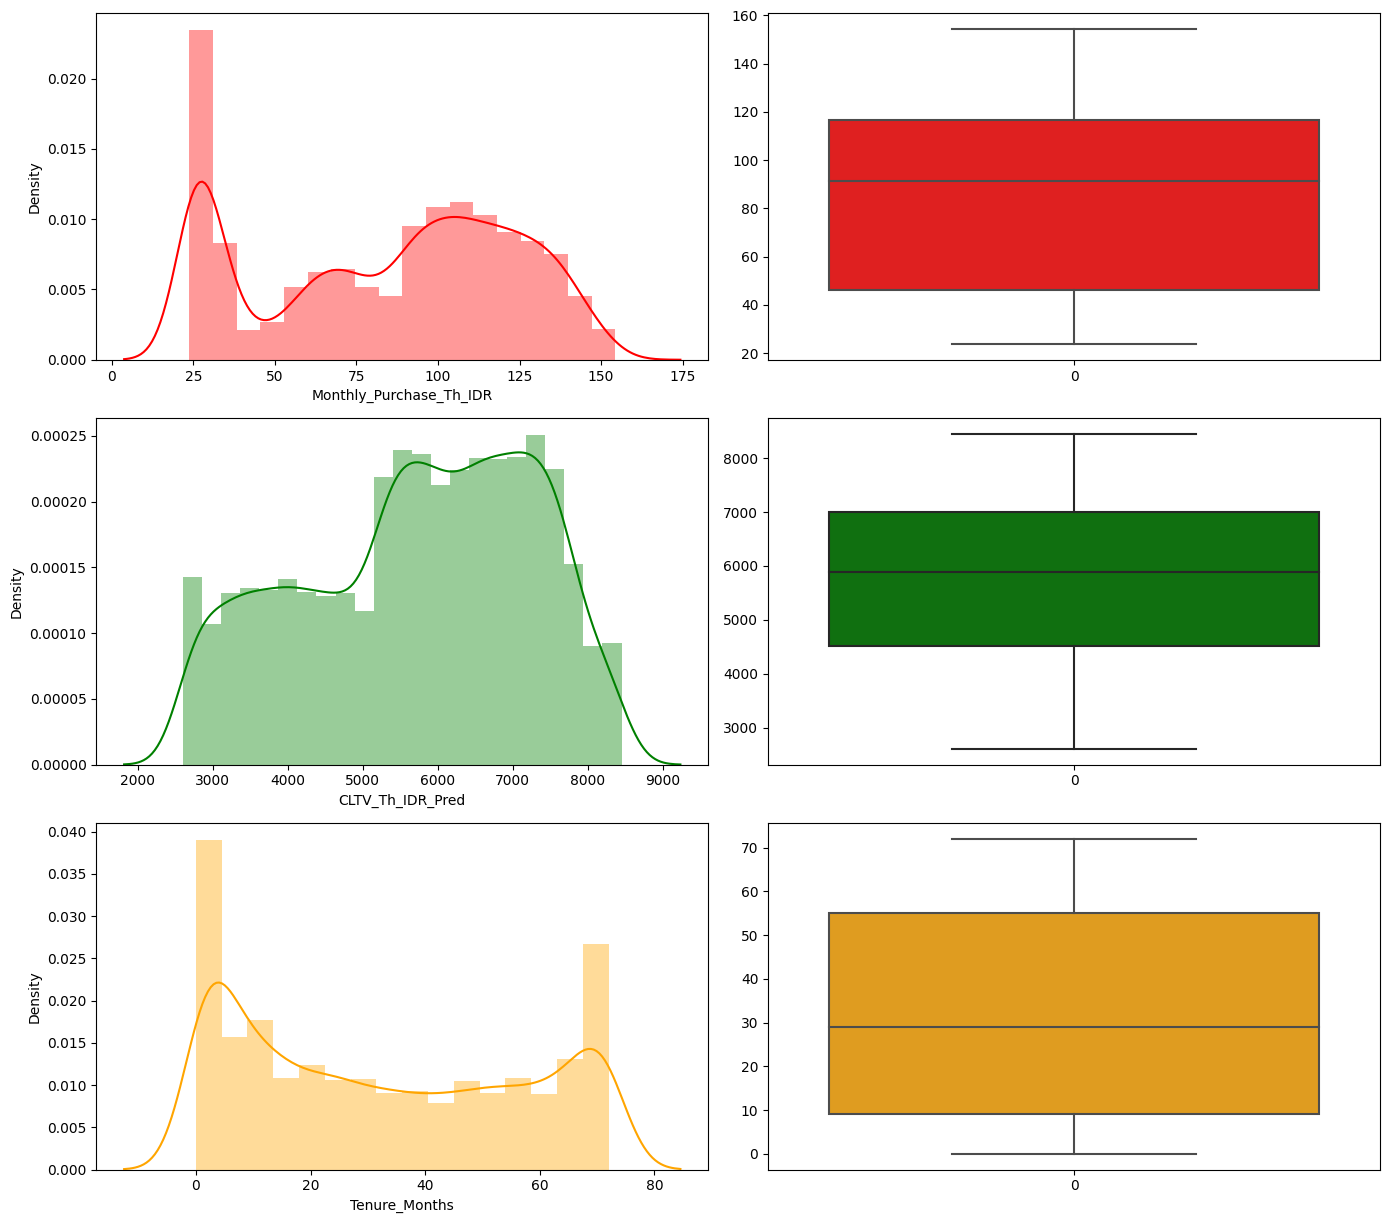

In [ ]:
# Visualizing outlier
plt.figure(figsize=(14,20))

plt.subplot(5,2,1)
sns.distplot(df_2['Monthly_Purchase_Th_IDR'],color='red')
plt.subplot(5,2,2)
sns.boxplot(df_2['Monthly_Purchase_Th_IDR'],color='red')

plt.subplot(5,2,3)
sns.distplot(df_2['CLTV_Th_IDR_Pred'],color='Green')
plt.subplot(5,2,4)
sns.boxplot(df_2['CLTV_Th_IDR_Pred'],color='Green')

plt.subplot(5,2,5)
sns.distplot(df_2['Tenure_Months'],color='orange')
plt.subplot(5,2,6)
sns.boxplot(df_2['Tenure_Months'],color='orange')

plt.tight_layout()
plt.show()

#Exploratory Data Analysis (EDA)

In [ ]:
type_ = ["No", "yes"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df_1['Churn_Label'].value_counts(), name="Churn"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Customer Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Churn', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [ ]:
# Churn (No) to Location
df_1.Churn_Label[df_1.Churn_Label == "No"].groupby(by = df_1.Location).count()

Location
Bandung    1466
Jakarta    3708
Name: Churn_Label, dtype: int64

In [ ]:
# Churn (Yes) to Location
df_1.Churn_Label[df_1.Churn_Label == "Yes"].groupby(by = df_1.Location).count()

Location
Bandung     546
Jakarta    1323
Name: Churn_Label, dtype: int64

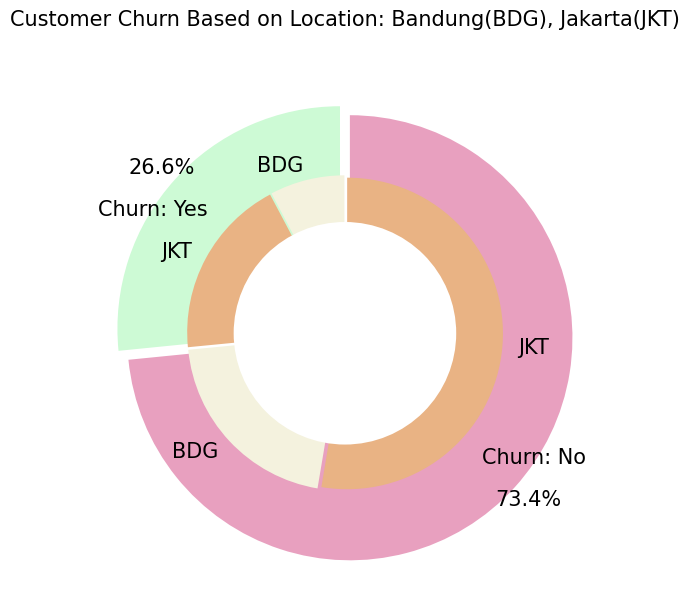

In [ ]:
# Churn to Location Visualizing
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn: No"]
values = [1869,5163]
labels_location = ["BDG","JKT","BDG","JKT"]
sizes_location = [546,1323 , 1466,3708]
colors = ['#CDFAD5', '#E8A0BF']
colors_location = ['#F4F2DE','#E9B384', '#F4F2DE','#E9B384']
explode = (0.3,0.3)
explode_location = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values,
        labels=labels,
        autopct='%1.1f%%',
        pctdistance=1.08,
        labeldistance=0.8,
        colors=colors,
        startangle=90,
        frame=True,
        explode=explode,
        radius=10,
        textprops =textprops,
        counterclock = True, )

plt.pie(sizes_location,
        labels=labels_location,
        colors=colors_location,
        startangle=90,
        explode=explode_location,
        radius=7,
        textprops = textprops,
        counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Customer Churn Based on Location: Bandung(BDG), Jakarta(JKT)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

##Customers with payment method are more likely to churn



In [ ]:
fig = px.histogram(df_1, x="Churn_Label", color = "Payment_Method", barmode = "group", title = "<b>Customer Churn Distribution Based on Payment Method<b>")
fig.update_layout(width=700, height=500, bargap=0.2)
fig.show()

In [ ]:
#Payment Method Distribution
labels = df_1['Payment_Method'].unique()
values = df_1['Payment_Method'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

fig = px.histogram(df_1, x="Churn_Label", color="Payment_Method", title="<b>Customer Payment Method distribution to Churn</b>")
fig.update_layout(width=500, height=300, bargap=0.1)
fig.show()

##Customers with device class are more likely to churn

In [ ]:
labels = df_1['Device_Class'].unique()
values = df_1['Device_Class'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Device Class Distribution</b>")
fig.show()

fig = px.histogram(df_1, x="Churn_Label", color="Device_Class", title="<b>Customer Device Class distribution More Likely to Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
df_1.head()

,Customer_ID,Tenure_Months,Location,Device_Class,Games_Product,Music_Product,Education_Product,Call_Center,Video_Product,Use_MyApp,Payment_Method,Monthly_Purchase_Th_IDR,Churn_Label,Longitude,Latitude,CLTV_Th_IDR_Pred
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


In [ ]:
 df_1[df_1["Location"]=="Bandung"][["Device_Class", "Churn_Label"]].value_counts()

Device_Class  Churn_Label
Mid End       No             565
High End      No             490
Low End       No             411
High End      Yes            385
Mid End       Yes            137
Low End       Yes             24
dtype: int64

In [ ]:
 df_1[df_1["Location"]=="Jakarta"][["Device_Class", "Churn_Label"]].value_counts()

Device_Class  Churn_Label
Mid End       No             1397
High End      No             1309
Low End       No             1002
High End      Yes             912
Mid End       Yes             322
Low End       Yes              89
dtype: int64

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Jakarta", "Bandung", "Jakarta", "Bandung"]],
  y = [1002, 411, 89, 24],
  name = 'Low_End',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Jakarta", "Bandung", "Jakarta", "Bandung"]],
  y = [1397, 565, 322, 137],
  name = 'Mid_End',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Jakarta", "Bandung", "Jakarta", "Bandung"]],
  y = [1309, 490, 912, 385],
  name = 'High_End',
))

fig.update_layout(title_text="<b>Churn Distribution to Device Class and Location</b>")

fig.show()

In [ ]:
#Customer Churn Label distribution to Games Product
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df_1,
                   x="Churn_Label",
                   color="Games_Product",
                   barmode="group",
                   title="<b>Customer Churn Label distribution to Games Product</b>",
                   color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
#Customer Churn distribution to Music Product
color_map = {"Yes": '#FFA15A', "No": '#AB63FA'}
fig = px.histogram(df_1,
                   x="Churn_Label",
                   color="Music_Product",
                   barmode="group",
                   title="<b> Customer Churn distribution to Music Product</b>",
                   color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
#Customer Churn distribution to Education Product
color_map = {"Yes": '#00CC96', "No":'#FFA15A'}
fig = px.histogram(df_1,
                   x="Churn_Label",
                   color="Education_Product",
                   barmode="group",
                   title="<b> Customer Churn distribution to Education Product</b>",
                   color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df_1, x="Churn_Label",
                   color="Video_Product",
                   barmode="group",
                   title="<b>Customer Churn distribution to Video Product</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

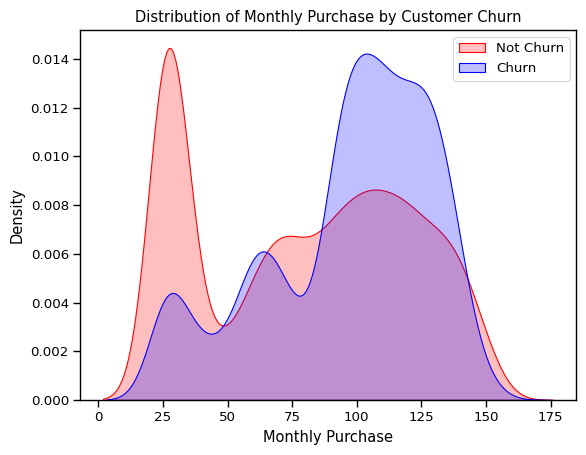

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df_1.Monthly_Purchase_Th_IDR[(df_1["Churn_Label"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df_1.Monthly_Purchase_Th_IDR[(df_1["Churn_Label"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Purchase');
ax.set_title('Distribution of Monthly Purchase by Customer Churn');

In [ ]:
#Boxplot
fig = px.box(df_1, x='Churn_Label', y = 'Tenure_Months')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Customer Churn</b>',
)

fig.show()

In [ ]:
#Create a label encoder object
le = LabelEncoder()
print(le)


LabelEncoder()


In [ ]:
df_1['Games_Product'] = le.fit_transform(df['Games_Product'])
df_1['Device_Class'] = le.fit_transform(df['Device_Class'])
df_1['Music_Product'] = le.fit_transform(df['Music_Product'])
df_1['Education_Product'] = le.fit_transform(df['Education_Product'])
df_1['Call_Center'] = le.fit_transform(df['Call_Center'])
df_1['Video_Product'] = le.fit_transform(df['Video_Product'])
df_1['Use_MyApp'] = le.fit_transform(df['Use_MyApp'])
df_1['Location'] = le.fit_transform(df['Location'])
df_1['Payment_Method'] = le.fit_transform(df['Payment_Method'])

In [ ]:
df_1.head()

,Customer_ID,Tenure_Months,Location,Device_Class,Games_Product,Music_Product,Education_Product,Call_Center,Video_Product,Use_MyApp,Payment_Method,Monthly_Purchase_Th_IDR,Churn_Label,Longitude,Latitude,CLTV_Th_IDR_Pred
0,0,2,1,2,2,2,0,0,0,0,2,70.005,1,106.816666,-6.2,4210.7
1,1,2,1,0,0,0,0,0,0,0,3,91.910,1,106.816666,-6.2,3511.3
2,2,8,1,0,0,0,2,0,2,2,3,129.545,1,106.816666,-6.2,6983.6
3,3,28,1,0,0,0,2,1,2,2,3,136.240,1,106.816666,-6.2,6503.9
4,4,49,1,0,0,2,2,0,2,2,1,134.810,1,106.816666,-6.2,6942.0


Text(0.5, 1.0, 'Correlation with Customer Churn Rate \n')

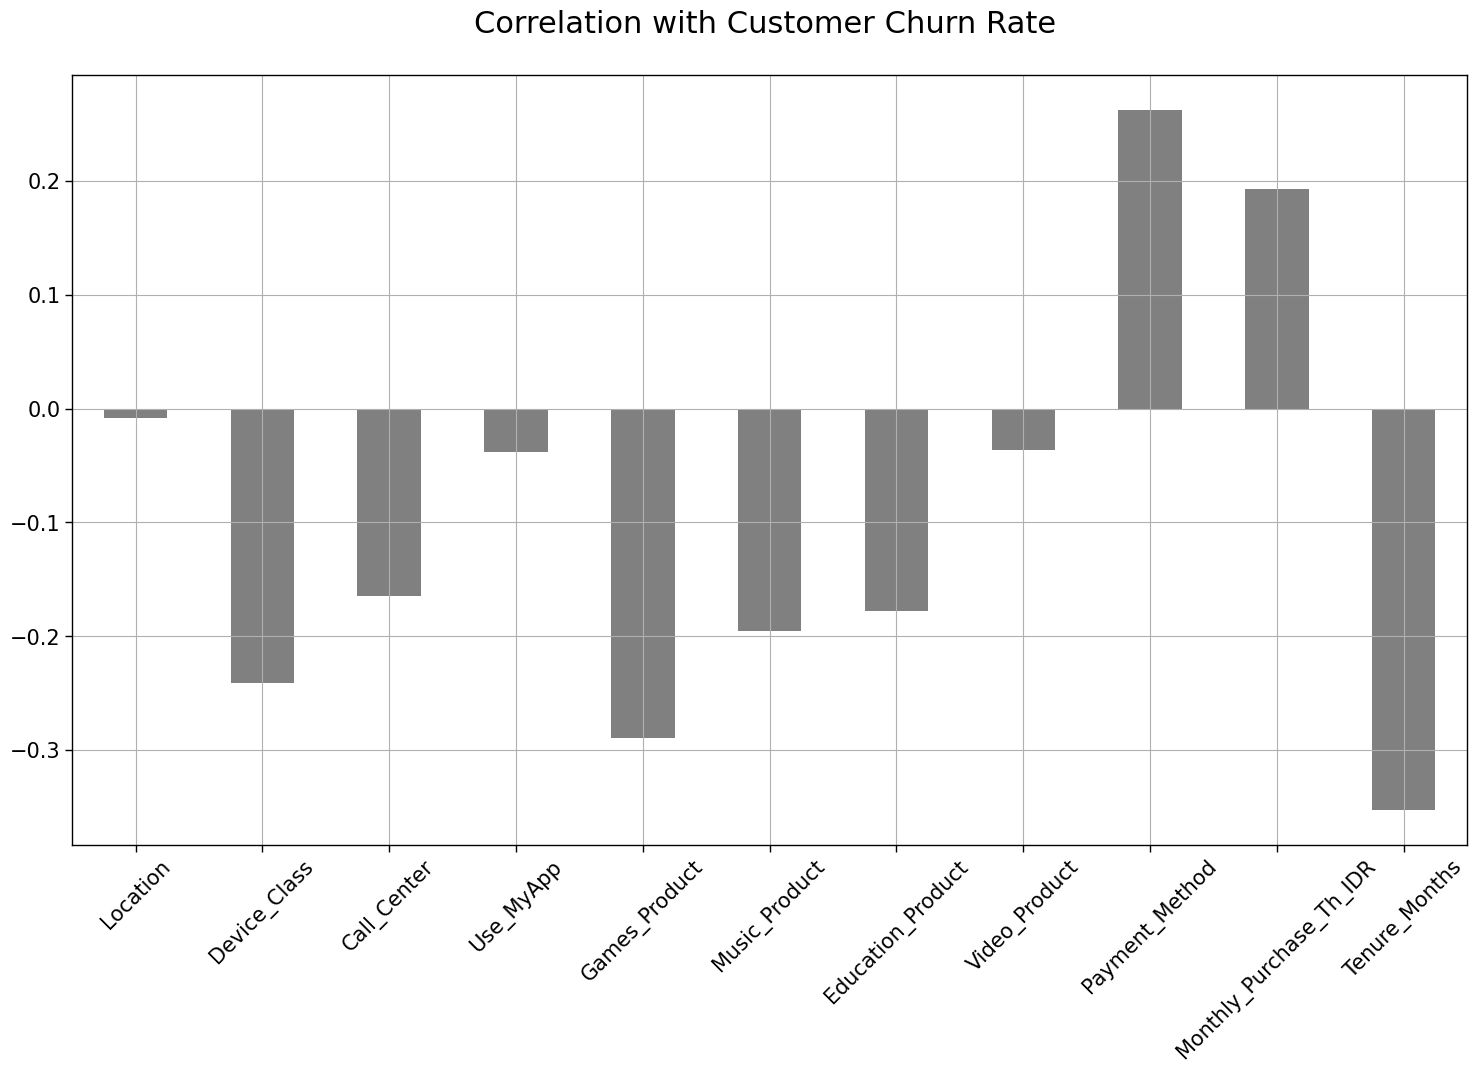

In [ ]:
# Correlation all features with churn_label
data2 = df_1[['Location', 'Device_Class', 'Call_Center', 'Use_MyApp', 'Games_Product', 'Music_Product','Education_Product', 'Video_Product', 'Payment_Method','Monthly_Purchase_Th_IDR', 'Tenure_Months']]

correlations = data2.corrwith(df_1.Churn_Label)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10),
        fontsize = 15,
        color = 'grey',
        rot = 45, grid = True)
plt.title('Correlation with Customer Churn Rate \n',
horizontalalignment="center", fontstyle = "normal",
fontsize = "22", fontfamily = "sans-serif")

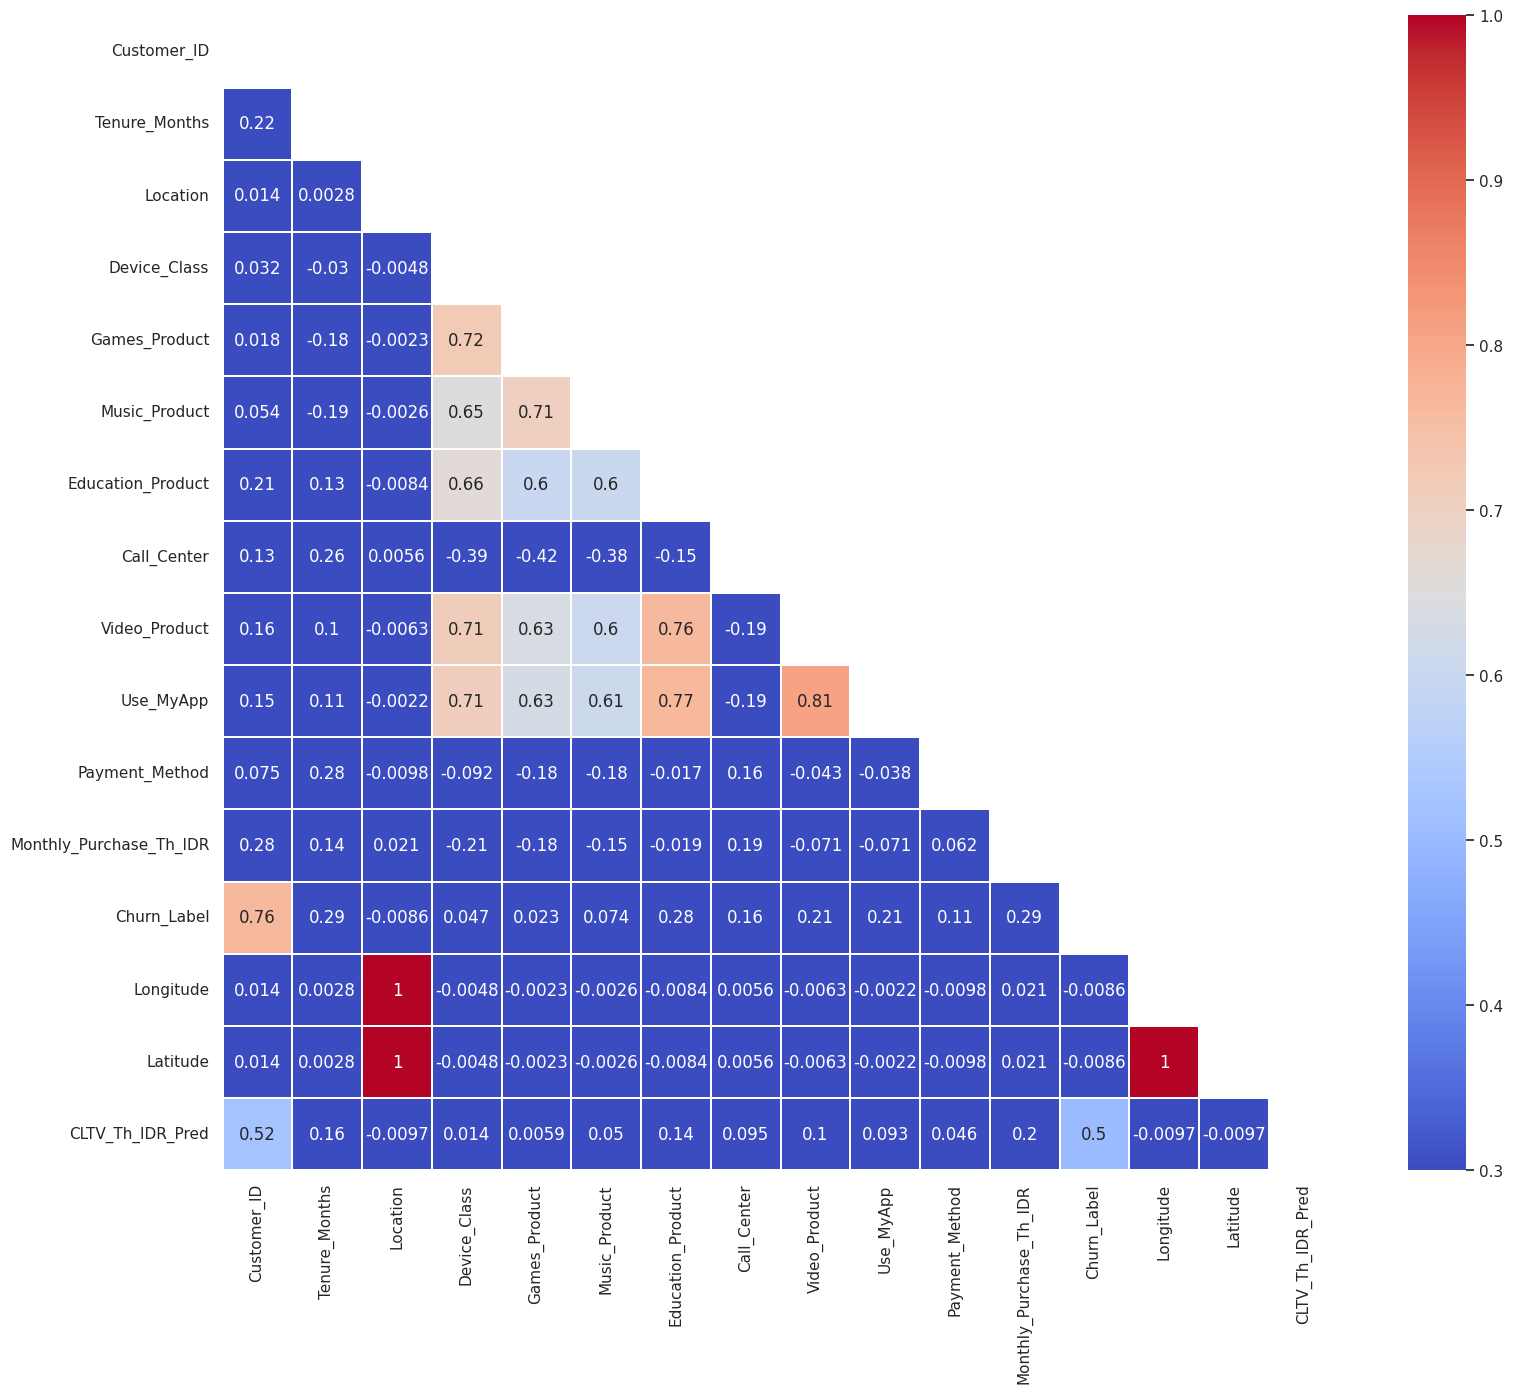

In [ ]:
# Find out the correlstion between the features
sns.set(style="white")
plt.figure(figsize=(18, 15))

corr = df_1.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=0.3, vmax=1)

<Axes: >

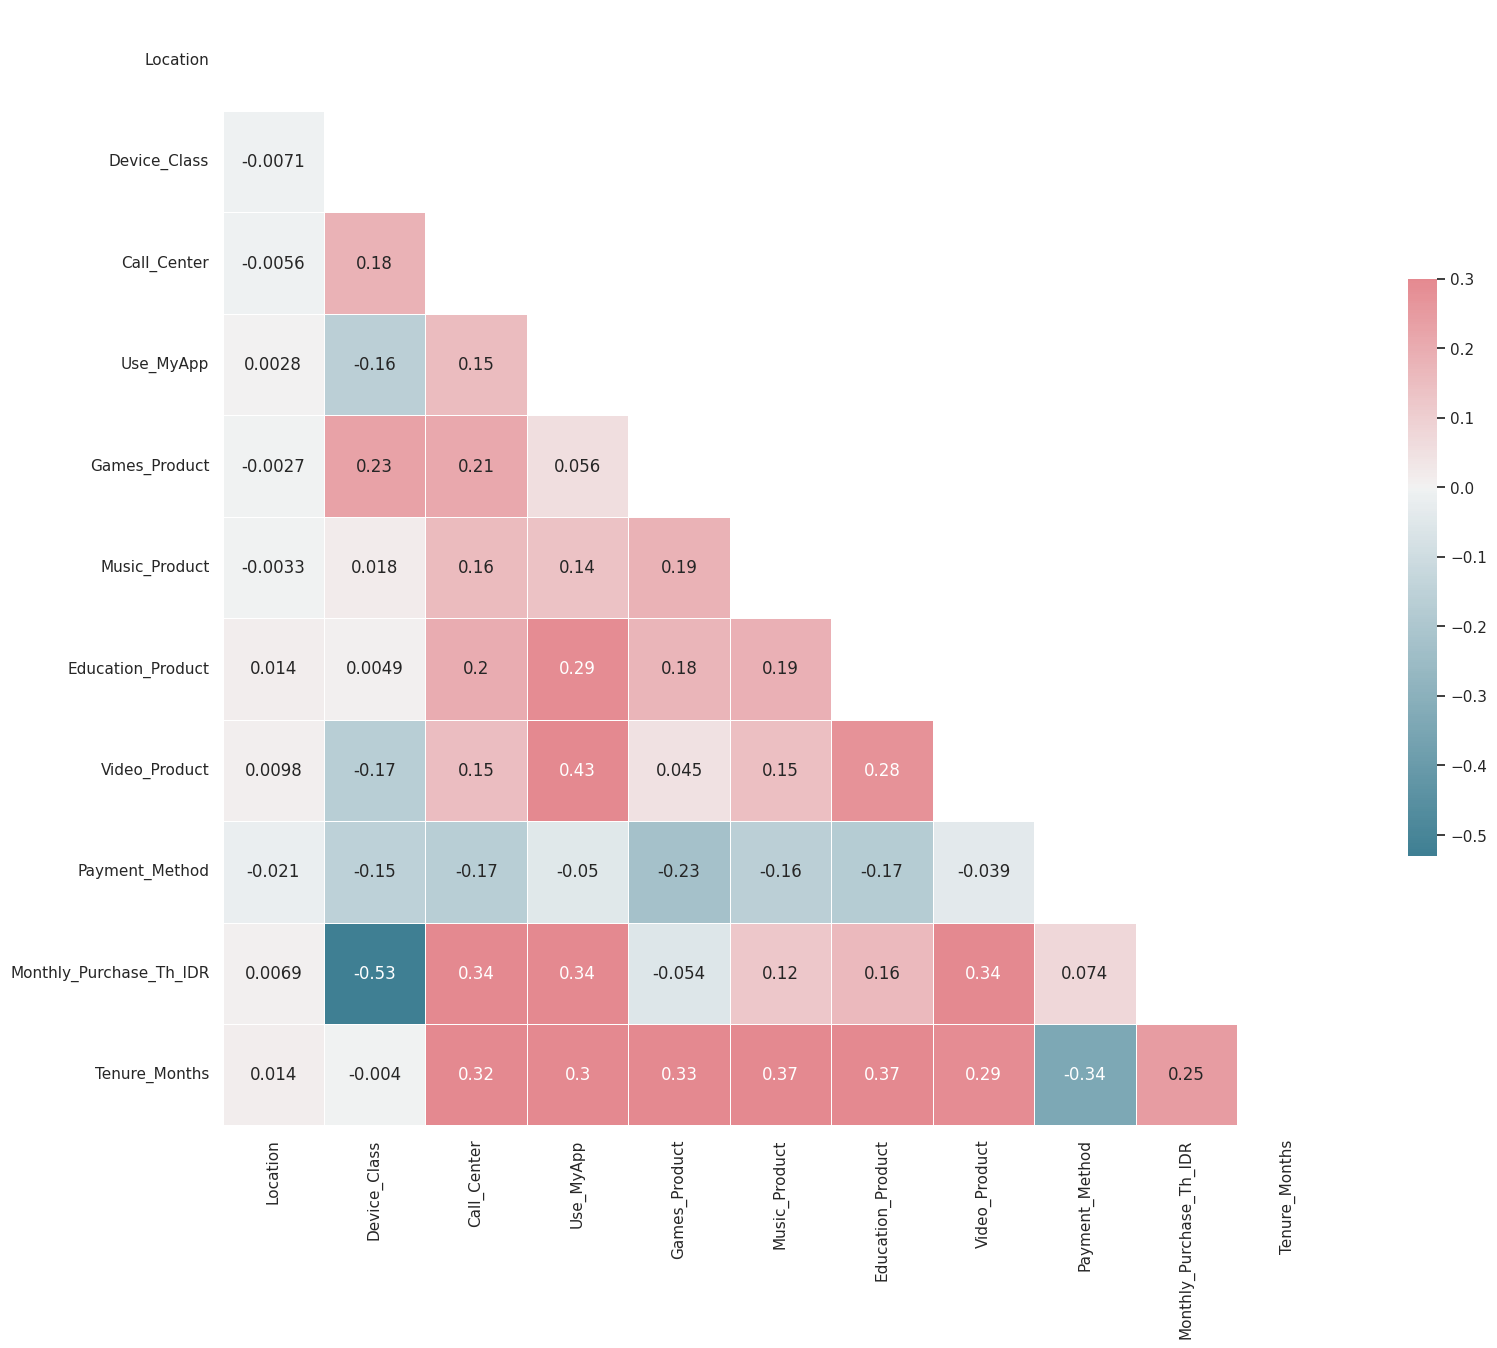

In [ ]:
#Set and compute the Correlation Matrix:
sns.set(style="white")
corr = data2.corr()

#Generate a mask for the upper triangle:

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio:
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True,annot = True, linewidths=.5, cbar_kws={"shrink": .5})

## Check Multicolinearity with VIF

In [ ]:
def encode_data(dataframe):
    if dataframe.dtype == "object":
        dataframe = LabelEncoder().fit_transform(dataframe)
    return dataframe

data = df_1.apply(lambda x: encode_data(x))
data.head()

,Customer_ID,Tenure_Months,Location,Device_Class,Games_Product,Music_Product,Education_Product,Call_Center,Video_Product,Use_MyApp,Payment_Method,Monthly_Purchase_Th_IDR,Churn_Label,Longitude,Latitude,CLTV_Th_IDR_Pred
0,0,2,1,2,2,2,0,0,0,0,2,70.005,1,106.816666,-6.2,4210.7
1,1,2,1,0,0,0,0,0,0,0,3,91.910,1,106.816666,-6.2,3511.3
2,2,8,1,0,0,0,2,0,2,2,3,129.545,1,106.816666,-6.2,6983.6
3,3,28,1,0,0,0,2,1,2,2,3,136.240,1,106.816666,-6.2,6503.9
4,4,49,1,0,0,2,2,0,2,2,1,134.810,1,106.816666,-6.2,6942.0


In [ ]:
X = data.drop(columns = "Churn_Label")
y = data["Churn_Label"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4, stratify =y)

In [ ]:
def distrib_plot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

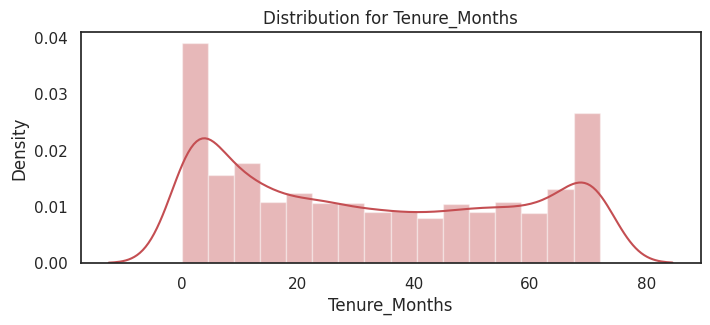

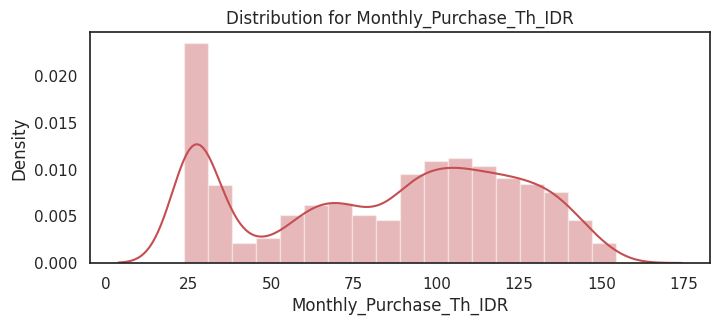

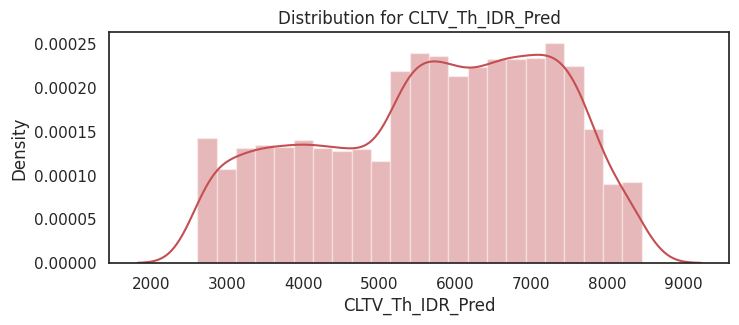

In [ ]:
col =  ["Tenure_Months", 'Monthly_Purchase_Th_IDR', 'CLTV_Th_IDR_Pred']
for features in col :distrib_plot(features, data)